In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# 
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Needed for Kmeans and Elbow method
from sklearn.cluster import KMeans

# Needed for dendrogram
import scipy
from scipy.cluster import hierarchy

# 
# from sklearn.decomposition import PCA        # not needed as only few components in data
from sklearn.cluster import AgglomerativeClustering
# from sklearn.preprocessing import StandardScaler, normalize        # not needed as no need to scale (x,y) in same scale
from sklearn.metrics import silhouette_score
# import scipy.cluster.hierarchy as shc        # duplicate

# 1. Target

analyzing Amazon 'drone' data and the optimal delivery points (clusters) to customers.

Amazon releases updates on drone delivery, robots, and packaging (aboutamazon.com)

## 1.1. Reading and preparing data

In [3]:
dataset = pd.read_csv('drone_delivery.csv', delimiter= ";")
dataset.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
clientid,5956.0,2978.500000,1719.493433,1.000000,1489.750000,2978.500000,4467.250000,5956.000000
x,5956.0,508.823177,271.061462,0.017692,282.582920,518.100892,727.156497,999.533215
y,5956.0,427.554772,289.044640,0.043285,170.079921,397.786441,669.982518,999.731720


In [9]:
# Dropping customer ID
data =dataset.drop('clientid', axis=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


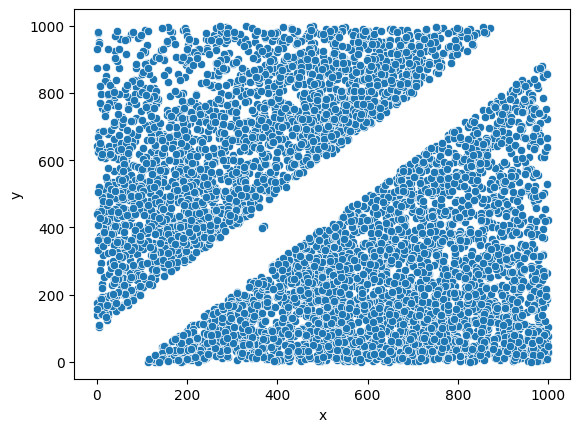

In [10]:
import seaborn as sns

sns.scatterplot(data=dataset, x="x", y="y")

plt.show()

# 2. Preprocessing data, reducing dimentions
No need.
- E.g. scaling not necessary. x,y in same scale.
- No 'nan's
- Only two dimentions (x,y)

# 3. Cluster analysis

- Selecting optimal number of clusters

- Both methods suggest '3' is not a bad selection.
(Note, also the silhouette_score calculation below gives best accuracy with cluster value 3)

# 3.1. Method 1: Elbow

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

[935060769.7611337, 518439931.1603346, 328933157.50373816, 234350353.7460186, 178583746.7323646, 146336761.19508067, 124626321.09344102, 110339464.65254748, 97081033.6450341]


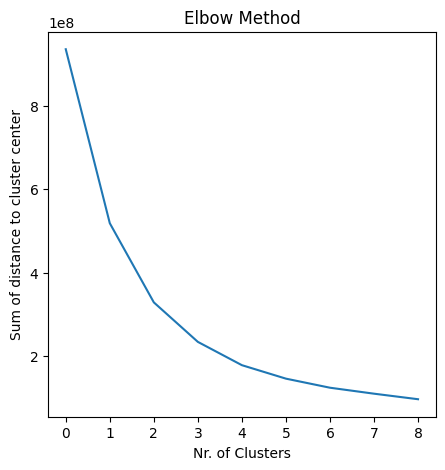

In [15]:
wcss = []  # Within-cluster sum of squares, calculating distances between center of cluster and observations.

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++' )    # number of clusters/centroids, method for initialization
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(5,5))
plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Nr. of Clusters')
plt.ylabel('Sum of distance to cluster center')

plt.show()

# 3.2. Dendrogram method


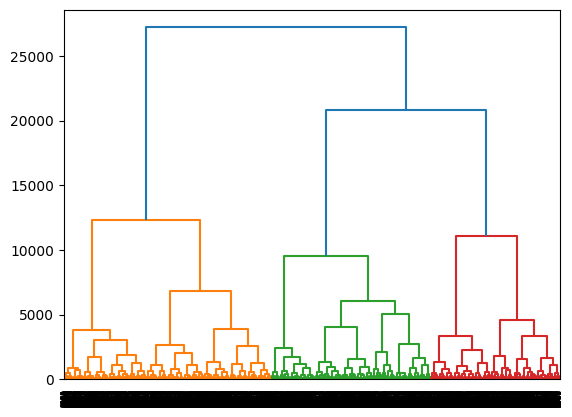

In [16]:
dendro=hierarchy.dendrogram(hierarchy.linkage(data,method='ward'))

# 4. Clustering the customers

# 4.1. Kmeans method

In [18]:
kmeans_1 = KMeans(n_clusters = 3)
kmeans_1.fit(data)

cluster_pred=kmeans_1.predict(data)  # List of 200, everyone assign to one of the clusters

cluster_labels=kmeans_1.labels_

cluster_center =kmeans_1.cluster_centers_ # Coordinates of the n. cluster centers
print(cluster_pred)
print(cluster_center)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 0 1 ... 1 2 2]
[[548.20586479 787.2788963 ]
 [198.44098904 383.25861847]
 [702.08109226 211.2703835 ]]


In [21]:
# Let's rebuild the dataset information with predicted cluster information

dataset_with_clusters = data.copy()
dataset_with_clusters['Cluster'] = cluster_labels

dataset_with_clusters.head()

,x,y,Cluster
0,622.771572,164.857623,2
1,416.357298,630.193634,0
2,292.735020,567.333231,1
3,737.211288,166.225676,2
4,540.475375,682.912298,0


In [23]:
# Print cluster center coordinates

df_centers = pd.DataFrame(cluster_center, columns= ('x', 'y'))
df_centers

,x,y
0,548.205865,787.278896
1,198.440989,383.258618
2,702.081092,211.270383


In [26]:
df_centers.iloc[:,0]

0    548.205865
1    198.440989
2    702.081092
Name: x, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

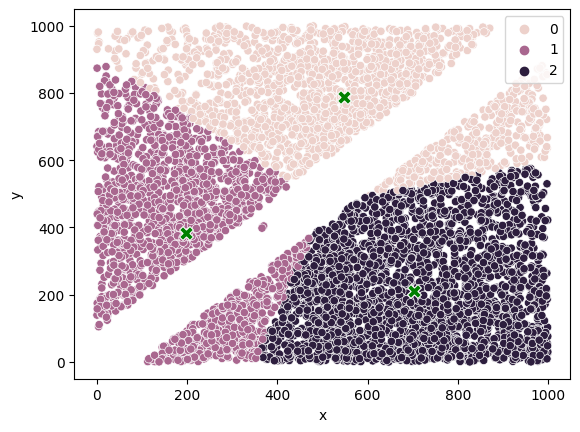

In [27]:
#import seaborn as sns

sns.scatterplot(data=dataset_with_clusters, x="x", y="y", hue='Cluster')
#sns.scatterplot(data=df_centers, x='x', y='x', marker='X', color='green', s=100)
sns.scatterplot(x=df_centers.iloc[:,0], y=df_centers.iloc[:,1], marker='X', color='green', s=100)
plt.show()

# 4.2. Evaluating performance 

Silhuette score calculation on different cluster values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

[0.42312779754569785, 0.42210856831487176, 0.40279186364019176, 0.4183538519727899, 0.39930954435718347, 0.3892677733107822]


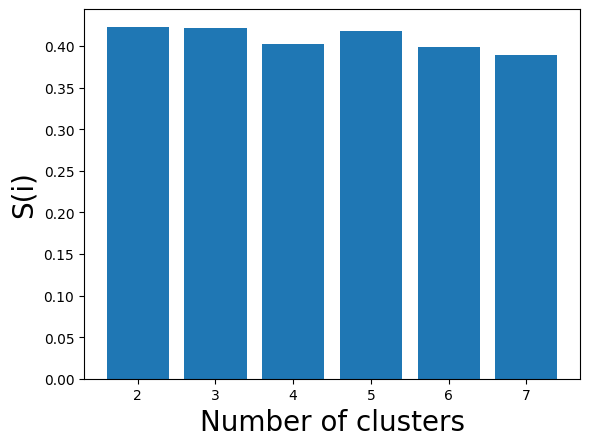

In [40]:
#k = [2, 3, 4, 5, 6]

silhouette_scores = []
k_list = []
for k in range(2,8):
    kmeans_x = KMeans(n_clusters = k)
    #silhouette_scores = []
    silhouette_scores.append(silhouette_score(data, kmeans_x.fit_predict(data)))
    k_list.append(k)
    #print(silhouette_scores)
# Appending the silhouette scores of the different models to the list
print(silhouette_scores)

# Plotting a bar graph to compare the results
plt.bar(k_list, silhouette_scores)

plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# 4.2. Aglomerate method



In [44]:
data

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


In [43]:
# Train model

ac = AgglomerativeClustering(n_clusters = 3)


ac.fit(data)

cluster_pred_ac=ac.fit_predict(data)  # List of 200, everyone assign to one of the clusters

cluster_labels_ac=ac.labels_

#cluster_center_ac =ac.cluster_centers_ # Coordinates of the n. cluster centers
print(cluster_pred_ac)
#print(cluster_center_ac)

[0 2 2 ... 2 1 0]


In [46]:
# Let's rebuild the dataset information with predicted cluster information

dataset_with_clusters_ac = data.copy()
dataset_with_clusters_ac['Cluster'] = cluster_labels

dataset_with_clusters_ac.head()

,x,y,Cluster
0,622.771572,164.857623,2
1,416.357298,630.193634,0
2,292.735020,567.333231,1
3,737.211288,166.225676,2
4,540.475375,682.912298,0


In [62]:
#dataset_with_clusters_ac.loc[dataset_with_clusters_ac['Cluster'] == 0,'x']

1       416.357298
4       540.475375
6       640.380050
8       481.896884
12      693.760444
           ...    
5942    583.988110
5943    670.989542
5945    361.033738
5947    671.626189
5951    832.857394
Name: x, Length: 1706, dtype: float64

In [65]:
# Calculate cluster centers

cluster_center_ac = np.zeros((3,2))

# as 3 clusters , range in 3

for i in range(3):  
    cluster_center_ac[i,0] = np.mean(dataset_with_clusters_ac.loc[dataset_with_clusters_ac['Cluster'] == i,'x'])
    cluster_center_ac[i,1] = np.mean(dataset_with_clusters_ac.loc[dataset_with_clusters_ac['Cluster'] == i,'y'])

print(cluster_center_ac)
# Print cluster center coordinates

df_centers_ac = pd.DataFrame(cluster_center_ac, columns= ('x', 'y'))
print(df_centers_ac)

[[548.89111239 787.51606871]
 [197.9526927  384.47700676]
 [701.50721956 211.24008044]]
            x           y
0  548.891112  787.516069
1  197.952693  384.477007
2  701.507220  211.240080


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

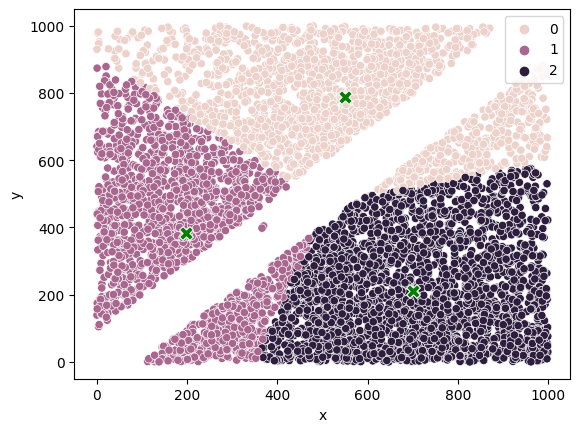

In [66]:
sns.scatterplot(data=dataset_with_clusters_ac, x="x", y="y", hue='Cluster')
#sns.scatterplot(data=df_centers, x='x', y='x', marker='X', color='green', s=100)
sns.scatterplot(x=df_centers_ac.iloc[:,0], y=df_centers_ac.iloc[:,1], marker='X', color='green', s=100)
plt.show()

[0.3708746711449338, 0.40546501390481887, 0.3591956699230132, 0.36758467392866945, 0.3415920780607851, 0.3348669981353969]


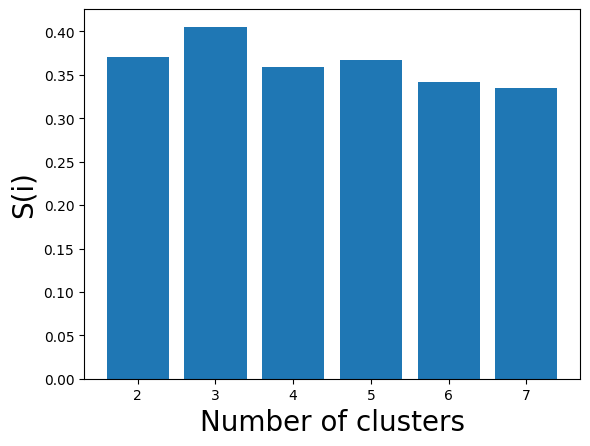

In [48]:
silhouette_scores = []
k_list = []
for k in range(2,8):
    ac = AgglomerativeClustering(n_clusters = k)
    #kmeans_x = KMeans(n_clusters = k)
    #silhouette_scores = []
    silhouette_scores.append(silhouette_score(data, ac.fit_predict(data)))
    k_list.append(k)
    #print(silhouette_scores)
# Appending the silhouette scores of the different models to the list
print(silhouette_scores)

# Plotting a bar graph to compare the results
plt.bar(k_list, silhouette_scores)

plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# 4.3. Counting members in clusters

...just out of curiocity...

In [70]:
# Share of customers in each cluster/ segment
print("nr of members in clusters according KMeans", dataset_with_clusters['Cluster'].value_counts())
print("----")
print("nr of members in clusters according Aglomerate Clusterming method", dataset_with_clusters_ac['Cluster'].value_counts())

nr of members in clusters according KMeans Cluster
2    2488
1    1762
0    1706
Name: count, dtype: int64
----
nr of members in clusters according Aglomerate Clusterming method Cluster
2    2488
1    1762
0    1706
Name: count, dtype: int64


# 5. Summary

I've tested two clustering methods Kmeans and Aglomerative Clustering with the same dataset.

The differences are relative small, however, there is some minor visible changes. While cluster centers have minor differences (<< 1%)
for instance the number of members in clusters is exactly the same.

For improvement
- if time would allow, it could be tested if any customer is in different clusters if we change between KMeans and Aglomerate Clustering